In [2]:
from gensim.models import Word2Vec

model = Word2Vec.load('models/w2v/tweets_model.w2v')

In [4]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
%matplotlib inline


def tsne_plot(labels, tokens, classes, clusters):
    tsne_model = TSNE(perplexity=15, n_components=2, init='pca', n_iter=3500, random_state=33)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []

    for value in new_values:
        x.append(value[0])
        y.append(value[1])

    colors = cm.rainbow(np.linspace(0, 1, clusters))
    plt.figure(figsize=(16, 9))
    for i in range(len(x)):
        plt.scatter(x[i], y[i], c=colors[classes[i]], alpha=0.75)
        plt.annotate(labels[i], alpha=0.75, xy=(x[i], y[i]), xytext=(5, 2),
                     textcoords='offset points', ha='right', va='bottom', size=10)
    plt.grid(True)
    plt.show()

In [5]:
labels = []
tokens = []
classes = []

samples = 15
for i, word in enumerate(['программирование', 'инструкция', 'рубашка', 'аэропорт', 'фильм', 'iphone', 'обидел', 'красивый', 'нравится', 'домашка']):#random.sample(list(model.wv.vocab), samples)):#['ссора', 'iphone', 'обидел', 'красивый', 'нравится', 'домашка']):#random.sample(list(model.wv.vocab), 10):
    tokens.append(model.wv[word])
    labels.append(word)
    classes.append(i)
    for similar_word, similarity in model.wv.most_similar(word, topn=20):
        tokens.append(model.wv[similar_word])
        labels.append(similar_word)
        classes.append(i)

C:\Users\Gerasimov Dmitrii\PycharmProjects\pythonProject\venv\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\Gerasimov Dmitrii\PycharmProjects\pythonProject\venv\lib\site-packages\sklearn\manifold\_t_sne.py:991: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use 

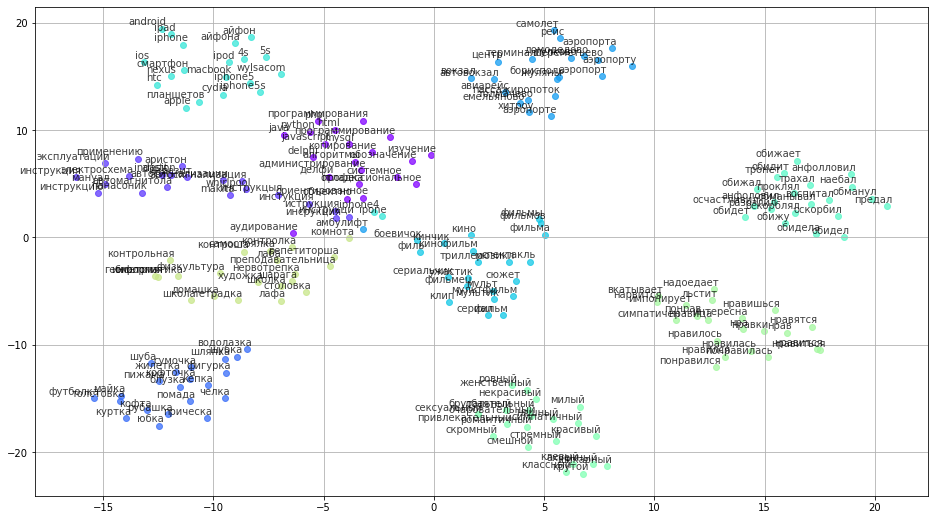

In [6]:
tsne_plot(labels, tokens, classes, samples)